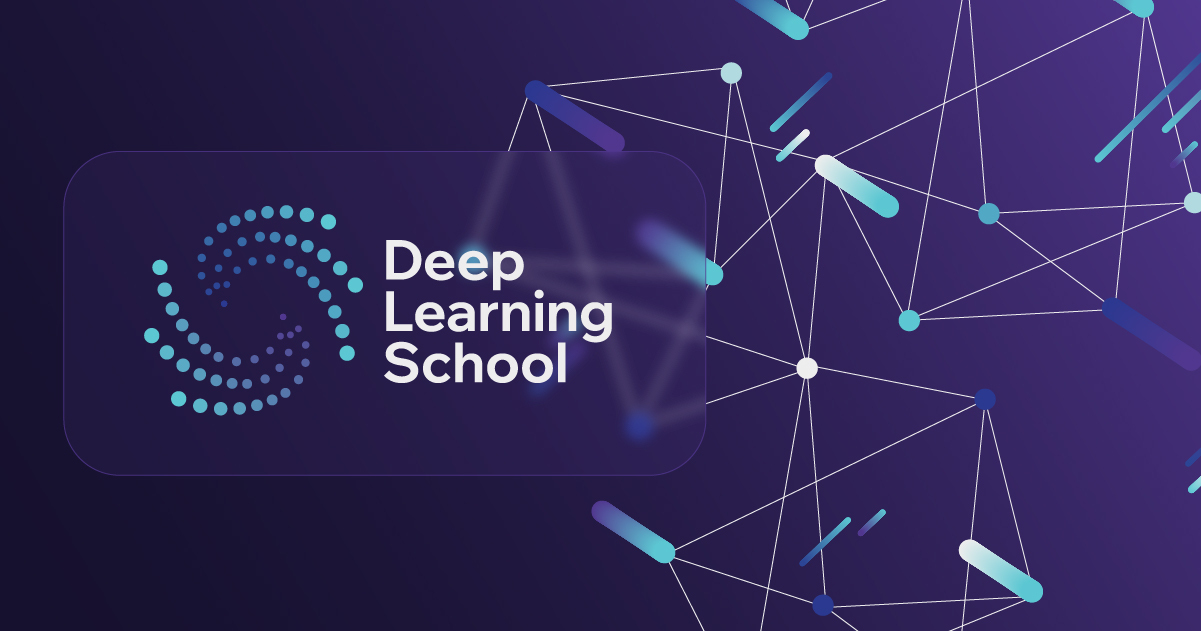

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

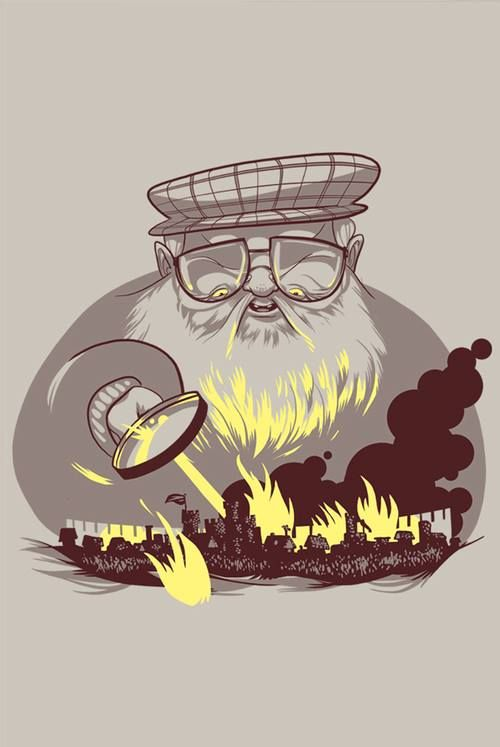

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [63]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 58.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 34.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [126]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data.sample(10)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
124,Roryn Drumm,NaN,0,Ironborn,NaN,NaN,NaN,NaN,House Drumm,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.003344,1
179,Symon Stripeback,NaN,1,NaN,NaN,NaN,NaN,NaN,House Targaryen,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.043478,1
233,Urrigon Greyjoy,NaN,1,Ironborn,268.0,NaN,NaN,NaN,House Greyjoy,NaN,...,NaN,NaN,NaN,NaN,0,0,37.0,0,0.073579,1
817,Ocley,Archmaester,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,1
1318,Robert Flowers,Ser,1,NaN,NaN,NaN,NaN,NaN,Kingsguard,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.060201,1
257,Wat (orphan),NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.003344,1
887,Allard Seaworth,Lady Marya,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.063545,0
862,Poxy Tym,NaN,1,northmen,NaN,NaN,NaN,NaN,House Stark,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033,0
981,Darlessa Marbrand,NaN,0,NaN,NaN,NaN,NaN,NaN,House Marbrand,Tygett Lannister,...,NaN,NaN,NaN,1.0,1,0,NaN,0,0.083612,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [123]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [66]:
data.drop(columns=['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'spouse', 'isAliveSpouse'], inplace=True)
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
house,381
book1,0
book2,0
book3,0
book4,0
book5,0


In [67]:
data['title'] = data['title'].fillna('loser')
data.loc[data['title'].value_counts()[data['title']].values < 30, 'title'] = "rare"
data['house'] = data['house'].fillna('homeless')
data.loc[data['house'].value_counts()[data['house']].values < 30, 'house'] = "rare"
data['culture'].fillna(data['culture'].mode()[0], inplace=True)
data['age'].fillna(data['age'].mean(), inplace=True)

<ipython-input-67-572f8a477253>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['culture'].fillna(data['culture'].mode()[0], inplace=True)
<ipython-input-67-572f8a477253>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [68]:
data['isPopular'] = data['popularity'] > 0.5
data['boolDeadRelations'] = data['numDeadRelations'] > 0
data['isPopular'] = data['isPopular'].astype(int)
data['boolDeadRelations'] = data['boolDeadRelations'].astype(int)
data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)

In [69]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
cult_map = {v: k for k, values in cult.items() for v in values}
data['culture'] = data['culture'].replace(cult_map)


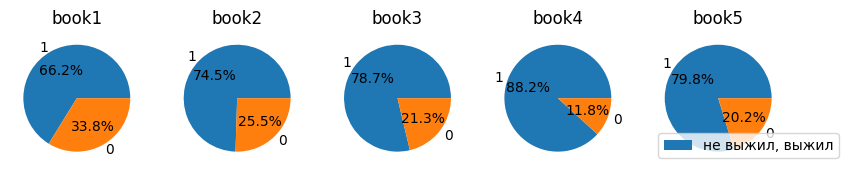

In [70]:
# Готовим данные для графика
data1 = data[data['book1'] == 1]['isAlive'].value_counts()
data2 = data[data['book2'] == 1]['isAlive'].value_counts()
data3 = data[data['book3'] == 1]['isAlive'].value_counts()
data4 = data[data['book4'] == 1]['isAlive'].value_counts()
data5 = data[data['book5'] == 1]['isAlive'].value_counts()
# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')

ax1.set_title("book1")
ax2.set_title("book2")
ax3.set_title("book3")
ax4.set_title("book4")
ax5.set_title("book5")

plt.legend(['не выжил, выжил'])

plt.show()

# Вывод: номер книги, в которой персонаж появился, скорее всего влияет на выживаемость

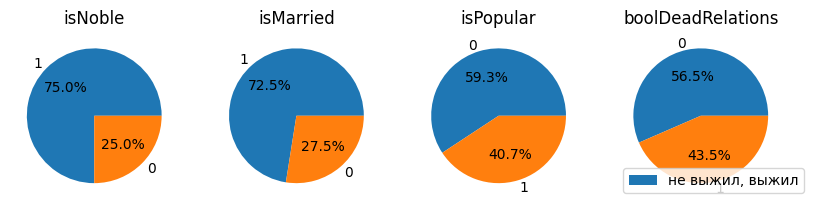

In [71]:
data_noble = data[data['isNoble'] == 1]['isAlive'].value_counts()
data_married = data[data['isMarried'] == 1]['isAlive'].value_counts()
data_popular = data[data['isPopular'] == 1]['isAlive'].value_counts()
data_bool_dead_rel = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,8))

ax1.pie(data_noble.values, labels=data_noble.index, autopct='%1.1f%%')
ax2.pie(data_married.values, labels=data_married.index, autopct='%1.1f%%')
ax3.pie(data_popular.values, labels=data_popular.index, autopct='%1.1f%%')
ax4.pie(data_bool_dead_rel.values, labels=data_bool_dead_rel.index, autopct='%1.1f%%')

ax1.set_title("isNoble")
ax2.set_title("isMarried")
ax3.set_title("isPopular")
ax4.set_title("boolDeadRelations")

plt.legend(['не выжил, выжил'])

plt.show()


# isNoble и isMarried серьезно влияют на выживаемость, isPopular и boolDeadRelations слабее, но пока не будем их убирать.

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [72]:
# удалил ранее

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [73]:
data['isAlive'].value_counts()
# переменная категориальная. датасет несбалансирован, но не критично (т.е. не нужно применять специальные методы борьбы)

,count
isAlive,
1,1212
0,345


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [74]:
data = data.reindex(columns=['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
      'isMarried', 'isNoble', 'age', 'boolDeadRelations', 'isPopular', 'isAlive'])
data

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,boolDeadRelations,isPopular,isAlive
S.No,,,,,,,,,,,,,,,
1,loser,1,Northmen,homeless,0,0,0,0,0,0,0,35.290323,1,1,0
2,rare,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.000000,1,1,1
3,Ser,1,Northmen,rare,0,0,0,1,0,0,1,35.290323,0,0,1
4,rare,0,Northmen,rare,0,0,0,0,0,1,1,23.000000,0,0,0
5,rare,0,Dornish,rare,0,0,0,1,0,1,1,29.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,rare,1,Northmen,homeless,1,0,1,1,0,0,1,35.290323,0,0,1
1554,loser,0,Northmen,homeless,1,1,0,0,0,0,0,35.290323,0,0,0
1555,loser,1,Northmen,rare,0,1,1,1,1,0,0,35.290323,0,0,0


In [79]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['culture'] = label_encoder.fit_transform(data['culture'])
data['house'] = label_encoder.fit_transform(data['house'])
data['title'] = label_encoder.fit_transform(data['title'])

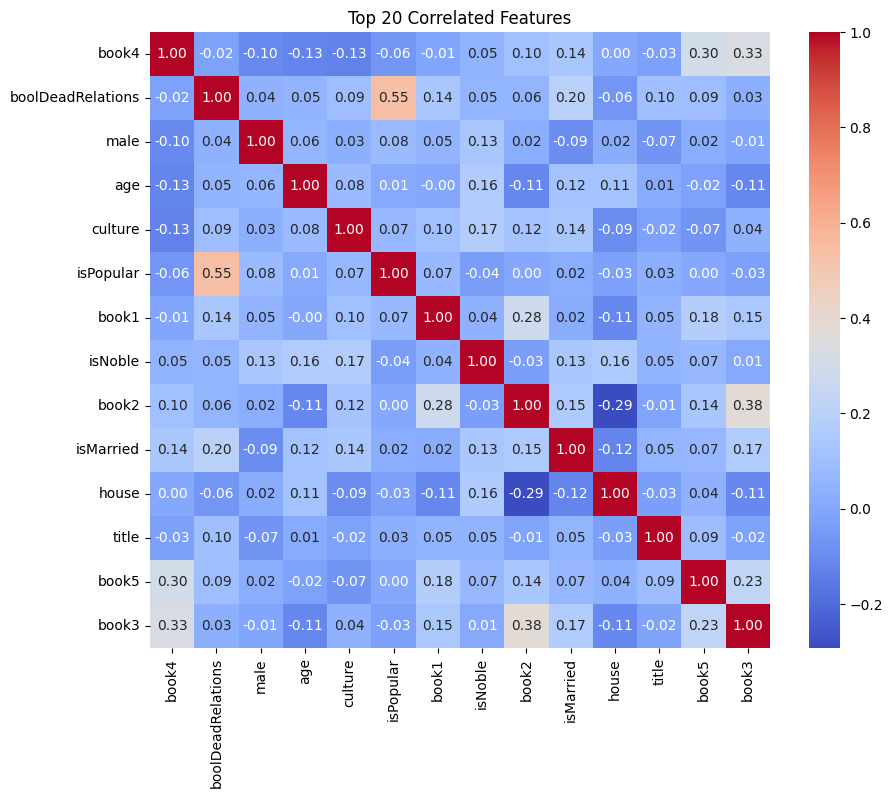

In [81]:
corr_matrix = data.corr()

top_n = 20
top_features = corr_matrix['isAlive'].abs().sort_values(ascending=False).index[1:top_n + 1]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Top {top_n} Correlated Features')
plt.show()

# корреляции выше 0.7 нет, значит доп меры не нужны

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [82]:
target_corr = data.corr()['isAlive'].drop('isAlive')
print("Корреляция признаков с целевой переменной:")
print(target_corr)

#как видно, влияние отдельных признаков довольно слабо

Корреляция признаков с целевой переменной:
title               -0.036035
male                -0.148290
culture             -0.132554
house                0.040786
book1               -0.112468
book2               -0.055998
book3                0.018427
book4                0.284014
book5                0.032531
isMarried           -0.049381
isNoble             -0.060572
age                 -0.148236
boolDeadRelations   -0.178177
isPopular           -0.118673
Name: isAlive, dtype: float64


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [83]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
data.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,boolDeadRelations,isPopular,isAlive
S.No,,,,,,,,,,,,,,,
1,1,1,24,7,0,0,0,0,0,0,0,35.290323,1,1,0
2,2,1,31,0,1,1,1,1,1,1,1,97.000000,1,1,1
3,0,1,24,8,0,0,0,1,0,0,1,35.290323,0,0,1
4,2,0,24,8,0,0,0,0,0,1,1,23.000000,0,0,0
5,2,0,7,8,0,0,0,1,0,1,1,29.000000,0,0,1


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [87]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [88]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

,0
dateOfBirth,0
age,0
isAlive,0


In [135]:
data_lol = data_lol.fillna(0)
data_lol.isna().sum()
X = data_lol.drop('isAlive', axis=1)
y = data_lol['isAlive']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [90]:
# LogisticRegression +++++
# RandomForestClassifier ++++++
# AdaBoostClassifier ++++++
# GaussianProcessClassifier ++++++
# GaussianNB +++++
# KNeighborsClassifier +++++
# SVC
# DecisionTreeClassifier

In [91]:
# Шаг 1. создание модели
random_forest = RandomForestClassifier(n_estimators=10)

# Шаг 2. обучение модели
random_forest.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_rf = random_forest.predict(X_test)

In [92]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier(n_estimators=100)

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

In [93]:
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
# Шаг 1. создание модели
gaussian_process = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Шаг 2. обучение модели
gaussian_process.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gpc = gaussian_process.predict(X_test)

In [94]:
# Шаг 1. создание модели
gnb = GaussianNB()

# Шаг 2. обучение модели
gnb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gnb = gnb.predict(X_test)

In [95]:
# Шаг 1. создание модели
knn = KNeighborsClassifier(n_neighbors=3)

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_knn = knn.predict(X_test)

In [96]:
# Шаг 1. создание модели
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Шаг 2. обучение модели
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc.predict(X_test)

In [97]:
# Шаг 1. создание модели
dtc = DecisionTreeClassifier(random_state=42)

# Шаг 2. обучение модели
dtc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_dtc = dtc.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [98]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [99]:
# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7917


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [100]:
# Шаг 3. Предсказание на тестовых данных
y_pred_rf = random_forest.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


In [101]:
# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


In [102]:
# Шаг 3. Предсказание на тестовых данных
y_pred_gpc = gaussian_process.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_gpc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


In [103]:
# Шаг 3. Предсказание на тестовых данных
y_pred_gnb = gnb.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7628


In [104]:
# Шаг 3. Предсказание на тестовых данных
y_pred_knn = knn.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


In [105]:
# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


In [106]:
# Шаг 3. Предсказание на тестовых данных
y_pred_dtc = dtc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7564


Выберите лучшую модель.

In [43]:
# Основываясь на метрике Accuracy, лучшей моделью является random forest.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [44]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 5.39MB/s]


In [107]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [108]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [112]:
test_data = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
test_data.drop(columns=['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'spouse', 'isAliveSpouse', 'dateOfBirth'], inplace=True)
test_data['title'] = test_data['title'].fillna('loser')
test_data.loc[test_data['title'].value_counts()[test_data['title']].values < 30, 'title'] = "rare"
test_data['house'] = test_data['house'].fillna('homeless')
test_data.loc[test_data['house'].value_counts()[test_data['house']].values < 30, 'house'] = "rare"
test_data['culture'].fillna(test_data['culture'].mode()[0], inplace=True)
test_data['age'].fillna(test_data['age'].mean(), inplace=True)
test_data['isPopular'] = test_data['popularity'] > 0.5
test_data['boolDeadRelations'] = test_data['numDeadRelations'] > 0
test_data['isPopular'] = test_data['isPopular'].astype(int)
test_data['boolDeadRelations'] = test_data['boolDeadRelations'].astype(int)
test_data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)

test_data = test_data.reindex(columns=['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
      'isMarried', 'isNoble', 'age', 'boolDeadRelations', 'isPopular'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test_data['culture'] = label_encoder.fit_transform(test_data['culture'])
test_data['house'] = label_encoder.fit_transform(test_data['house'])
test_data['title'] = label_encoder.fit_transform(test_data['title'])

<ipython-input-112-6d24c4a0d2ea>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['culture'].fillna(test_data['culture'].mode()[0], inplace=True)
<ipython-input-112-6d24c4a0d2ea>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [113]:
test_data.sample(10)

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,boolDeadRelations,isPopular
S.No,,,,,,,,,,,,,,
1726,1,0,24,1,1,1,1,1,1,0,0,34.000000,0,0
1736,0,1,45,1,1,1,1,1,1,0,1,-3701.032468,0,0
1773,2,0,16,0,1,1,1,1,1,0,1,42.000000,0,0
1870,0,1,24,1,0,0,0,1,0,0,1,-3701.032468,0,0
1656,1,1,20,1,0,1,1,1,1,0,0,-3701.032468,0,0
1680,0,1,43,1,1,1,1,1,1,0,1,32.000000,0,0
1789,2,1,24,1,0,1,1,1,0,0,1,-3701.032468,0,0
1910,2,1,24,1,0,1,1,1,0,0,1,-3701.032468,0,0
1939,2,1,24,1,0,0,0,0,1,0,1,-3701.032468,0,0


In [117]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.3 MB/s eta 0:00:00


In [118]:
from catboost import CatBoostClassifier
cat_features = [0, 1]
model = CatBoostClassifier(
    iterations=158,
    learning_rate=0.028955734064602758,
    depth=7,
    l2_leaf_reg=2.0775422238355734,
    random_strength=1.3866159314930435,
    bagging_temperature=0.8648248725171424,

)
model.fit(X_train, y_train,
        cat_features=cat_features,
        verbose=False
)
y_pred = model.predict(test_data)
submission['isAlive'] = y_pred

In [108]:
def objective(trial):
    # Задаем пространство поиска гиперпараметров
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),  # Регуляризация
        'random_strength': trial.suggest_float('random_strength', 0.1, 10),  # Случайность
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),  # Температура бэггинга
    }

    # Создаем модель CatBoost
    model = CatBoostClassifier(
        **params,
        cat_features=cat_features,
        verbose=False,  # Отключаем вывод
        random_state=42
    )

    # Оценка модели с помощью кросс-валидации
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    return score

# Создаем study и запускаем оптимизацию
study = optuna.create_study(direction='maximize')  # Максимизируем accuracy
study.optimize(objective, n_trials=50)  # Количество trials

# Выводим лучшие параметры
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-03-10 11:58:42,325] A new study created in memory with name: no-name-e0962cce-064a-489c-81d7-1c3d0d379a5c
[I 2025-03-10 11:59:55,069] Trial 0 finished with value: 0.7719927446615549 and parameters: {'iterations': 769, 'learning_rate': 0.11583743253429692, 'depth': 10, 'l2_leaf_reg': 7.33153861128485, 'random_strength': 3.558828050278987, 'bagging_temperature': 0.9805019381396551}. Best is trial 0 with value: 0.7719927446615549.
[I 2025-03-10 12:00:27,703] Trial 1 finished with value: 0.761713661472504 and parameters: {'iterations': 935, 'learning_rate': 0.27682365817612015, 'depth': 8, 'l2_leaf_reg': 9.464738904445028, 'random_strength': 2.2932798115628903, 'bagging_temperature': 0.7727633900864063}. Best is trial 0 with value: 0.7719927446615549.
[I 2025-03-10 12:00:41,004] Trial 2 finished with value: 0.7739116992332427 and parameters: {'iterations': 508, 'learning_rate': 0.18777795744397763, 'depth': 7, 'l2_leaf_reg': 1.8179370441342546, 'random_strength': 8.834597887407242,

Best parameters: {'iterations': 158, 'learning_rate': 0.028955734064602758, 'depth': 7, 'l2_leaf_reg': 2.0775422238355734, 'random_strength': 1.3866159314930435, 'bagging_temperature': 0.8648248725171424}
Best accuracy: 0.804730398219144


In [139]:
test_data.columns

Index(['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'age', 'boolDeadRelations',
       'isPopular'],
      dtype='object')

## По сути, следующий код - все, что нам нужно, так как для обучения простых линейных моделей мы убираем все "шумные" признаки и оставляем только то, жив ли человек на момент 305г, создав новую булевую переменную zhiv. Остальной анализ нужен для честности)

In [151]:
data_lol = data.drop(columns=['name', 'title', 'male', 'culture', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'numDeadRelations', 'popularity'])
test_data = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
test_lol = test_data.drop(columns=['name', 'title', 'male', 'culture', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'numDeadRelations', 'popularity'])
test_lol = test_lol.fillna(0)
test_lol['zhiv'] = (test_lol['dateOfBirth'] + test_lol['age']) > 304.9
test_lol['zhiv'] = test_lol['zhiv'].astype(int)
data_lol['zhiv'] = (data_lol['dateOfBirth'] + data_lol['age']) > 304.9
data_lol['zhiv'] = data_lol['zhiv'].astype(int)

In [152]:
lr = LogisticRegression()
X_train, y_train = data_lol.drop(columns=['isAlive']), data_lol['isAlive']
lr.fit(X_train, y_train)
y_pred = lr.predict(test_lol)
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [153]:
submission.to_csv("/content/new_submission.csv", index=False)